<a href="https://colab.research.google.com/github/morento101/Machine_Learning_Tutorial/blob/main/Machine_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 200/200 [00:00<00:00, 346.26it/s, loss=0.012640317]


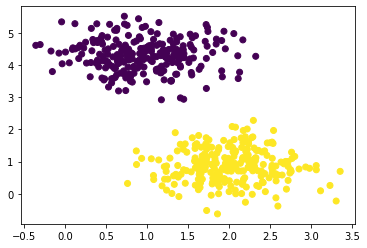

In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from jax import grad, jit
from tqdm import tqdm


X, y = make_blobs(
    n_samples=500, n_features=2, centers=2,
    cluster_std=0.5, random_state=0
)
X = np.hstack((X, np.ones_like(y).reshape(-1, 1)))
y[y == 0] = -1


plt.scatter(X[:, 0], X[:, 1], c=y)


def predict(w, X):
  return jnp.dot(X, w)


def loss(w):
  preds = predict(w, X)
  return jnp.mean(jnp.clip(1 - jnp.multiply(y, preds), a_min=0))


np.random.seed(0)
w = np.random.randn(3)


n_iters = 200
lr = 0.01
loss_grad = jit(grad(loss))

losses = np.zeros(n_iters)
pbar = tqdm(range(n_iters))

for i in range(n_iters):
    grads = loss_grad(w)
    w = w - lr * grads

    tmp_loss = loss(w)
    losses[i] = tmp_loss

    pbar.set_postfix({'loss': tmp_loss})
    pbar.update()

    if tmp_loss == 0:
        break

pbar.close()

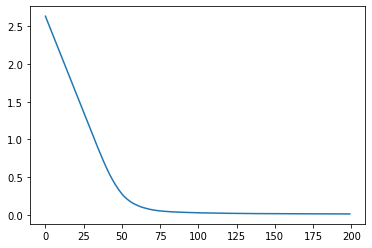

In [27]:
plt.plot(losses)

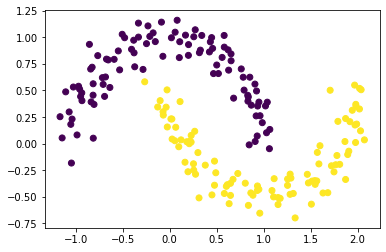

In [28]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.1, random_state=0)
X = np.hstack((X, np.ones_like(y).reshape(-1, 1)))
y[y == 0] = -1

plt.scatter(X[:, 0], X[:, 1], c=y)

In [29]:
lengthscale = 0.3


def rbf_kernel(x, z):
  return jnp.exp(-jnp.linalg.norm(x - z) ** 2 / lengthscale)

In [30]:
from jax import vmap

kernel = rbf_kernel
vec_kernel = jit(vmap(vmap(kernel, (0, None)), (None, 0)))


In [31]:
def predict(alphas, X_test):
  return jnp.dot(vec_kernel(X, X_test), alphas)


def loss(alphas):
  preds = predict(alphas, X)
  return jnp.mean(jnp.clip(1 - jnp.multiply(y, preds), a_min=0))

In [32]:
np.random.seed(0)

alphas = np.random.randn(y.size)

n_iters = 200
lr = 0.01
loss_grad = jit(grad(loss))

losses = np.zeros(n_iters)
pbar = tqdm(range(n_iters))

for i in range(n_iters):
    grads = loss_grad(alphas)
    alphas = alphas - lr * grads

    tmp_loss = loss(alphas)
    losses[i] = tmp_loss

    pbar.set_postfix({'loss': tmp_loss})
    pbar.update()

    if tmp_loss == 0:
        break

pbar.close()

100%|██████████| 200/200 [00:01<00:00, 183.74it/s, loss=0.27256426]


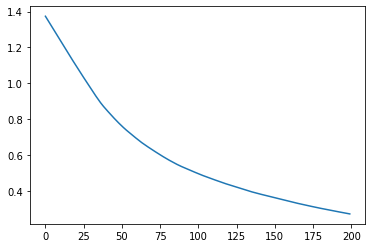

In [33]:
plt.plot(losses)

In [34]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

n_steps = 100

x_test_grid = np.linspace(x_min, x_max, n_steps)
y_test_grid = np.linspace(y_min, y_max, n_steps)

X1_test, X2_test = np.meshgrid(x_test_grid, y_test_grid, indexing='ij')
X_test = np.hstack((
    X1_test.reshape(-1, 1), 
    X2_test.reshape(-1, 1), 
    np.ones((n_steps ** 2, 1))
))

preds = predict(alphas, X_test)

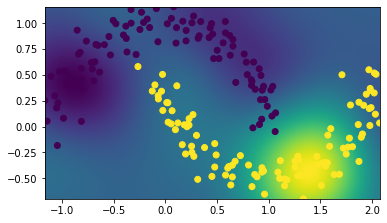

In [35]:
plt.imshow(
    preds.reshape(n_steps, n_steps).T, 
    extent=[x_min, x_max, y_min, y_max],
    origin='lower'
)

plt.scatter(X[:, 0], X[:, 1], c=y);